In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# Load training dataset
train_data = pd.read_csv("mnist_train.csv")
train_data = train_data.sample(n=8000, random_state=42)
X_train = train_data.drop("label", axis=1)
y_train = train_data["label"]

# Load test dataset
test_data = pd.read_csv("mnist_test.csv")
test_data= test_data.sample(n=2000, random_state=42)
X_test = test_data.drop("label", axis=1)
y_test = test_data["label"]


In [5]:
train_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [6]:
train_data['label'].unique()

array([7, 3, 8, 9, 5, 4, 2, 6, 1, 0])

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
learning_rates = [0.0001, 0.1, 0.2, 0.3,0.4,0.5]
perceptron_accuracies = []

for lr in learning_rates:
    perc = Perceptron(max_iter=1000, eta0=lr, random_state=42)
    perc.fit(X_train, y_train)
    y_pred = perc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    perceptron_accuracies.append(acc)
    print(f"Perceptron | LR={lr} | Accuracy={acc:.4f}")



Perceptron | LR=0.0001 | Accuracy=0.8310
Perceptron | LR=0.1 | Accuracy=0.8655
Perceptron | LR=0.2 | Accuracy=0.8650
Perceptron | LR=0.3 | Accuracy=0.8650
Perceptron | LR=0.4 | Accuracy=0.8650
Perceptron | LR=0.5 | Accuracy=0.8650


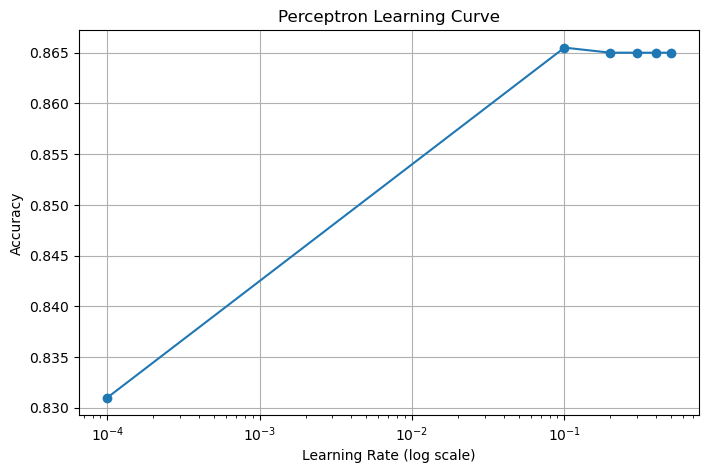

In [9]:
plt.figure(figsize=(8,5))
plt.plot(learning_rates, perceptron_accuracies, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Accuracy")
plt.title("Perceptron Learning Curve")
plt.grid(True)
plt.show()


In [10]:
#MLP using sigmoid
mlp = MLPClassifier(
    hidden_layer_sizes=(128),
    activation='logistic',
    max_iter=20,
    random_state=42
)

mlp.fit(X_train, y_train)


C:\Users\Barnala Manognaram\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=128, max_iter=20,
              random_state=42)

In [11]:
y_pred_mlp_sigmoid = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mlp_sigmoid)
print("accuracy of MLP with sigmoid function",accuracy)


accuracy of MLP with sigmoid function 0.9225


In [12]:
#MLP using ReLU
mlp_relu = MLPClassifier(
    hidden_layer_sizes=(128),
    activation='relu',
    max_iter=20,
    random_state=42
)

mlp_relu.fit(X_train, y_train)


C:\Users\Barnala Manognaram\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128, max_iter=20, random_state=42)

In [13]:
y_pred_mlp_relu = mlp_relu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mlp_relu)
print("accuracy of MLP with relu function",accuracy)


accuracy of MLP with relu function 0.9415


In [14]:
#MLP using Tanh
mlp_tanh = MLPClassifier(
    hidden_layer_sizes=(128),
    activation='tanh',
    max_iter=20,
    random_state=42
)

mlp_tanh.fit(X_train, y_train)


C:\Users\Barnala Manognaram\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=128, max_iter=20,
              random_state=42)

In [15]:
y_pred_mlp_tanh = mlp_tanh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_mlp_tanh)
print("accuracy of MLP with tanh function",accuracy)


accuracy of MLP with tanh function 0.926


In [23]:
perceptron_accuracy=accuracy_score(y_test, y_pred)
print("Perceptron Accuracy:", perceptron_accuracy)
mlp_accuracy_sigmoid=accuracy_score(y_test, y_pred_mlp_sigmoid)
print("MLP Accuracy using sigmid:", mlp_accuracy_sigmid)
mlp_accuracy_relu=accuracy_score(y_test, y_pred_mlp_relu)
print("MLP Accuracy using relu:", mlp_accuracy_relu)
mlp_accuracy_tanh=accuracy_score(y_test, y_pred_mlp_tanh)
print("MLP Accuracy tanh:", mlp_accuracy_tanh)


Perceptron Accuracy: 0.865
MLP Accuracy using sigmid: 0.9225
MLP Accuracy using relu: 0.9415
MLP Accuracy tanh: 0.926


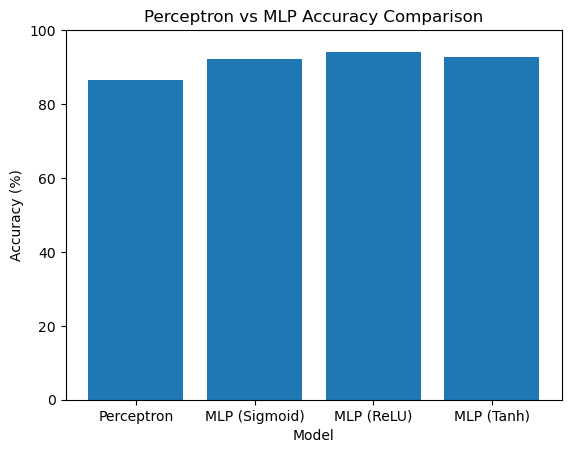

In [26]:
models = ['Perceptron', 'MLP (Sigmoid)', 'MLP (ReLU)', 'MLP (Tanh)']
accuracies = [perceptron_accuracy*100, mlp_accuracy_sigmoid*100, mlp_accuracy_relu*100, mlp_accuracy_tanh*100]

plt.figure()
plt.bar(models, accuracies)X
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Perceptron vs MLP Accuracy Comparison')
plt.ylim(0, 100)

plt.show()
